# Assignment-03     A.Hari Priya


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


# Loading the dataset

In [3]:
#2. Load the dataset.
data=pd.read_csv("Housing.csv")

# Univariate Analysis

## Histogram

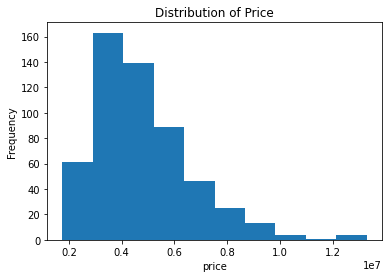

In [4]:
#Perform Below Visualizations.
#Univariate analysis
plt.hist(data['price'])
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of Price')
plt.show()

## Pie Chart

In [5]:
categories = list(data['stories'].unique())
value_counts = data['stories'].value_counts()

([<matplotlib.patches.Wedge at 0x27314e74610>,
 [Text(0.2173194882526601, 1.078319173540748, '3'),
  Text(-0.6744482341032301, -0.8689761674033614, '4'),
  Text(0.8511907813779661, -0.6967598249735469, '2'),
  Text(1.0723198311988387, -0.24521455833146277, '1')])

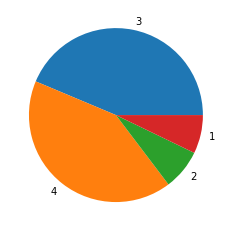

In [6]:
plt.pie(value_counts,labels=categories)

## Bivariate Analysis

# Stacked Bar Chart

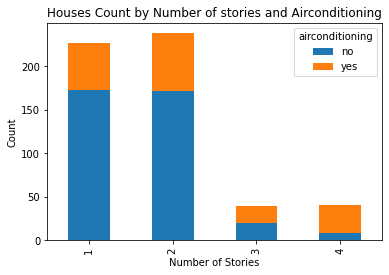

In [12]:
survival_counts = data.groupby('stories')['airconditioning'].value_counts().unstack()
colors = ['tab:blue', 'tab:orange']
survival_counts.plot(kind='bar', stacked=True,color=colors)
plt.xlabel('Number of Stories')
plt.ylabel('Count')
plt.title('Houses Count by Number of stories and Airconditioning')
plt.show()

## Box Plot

In [7]:
import seaborn as sns

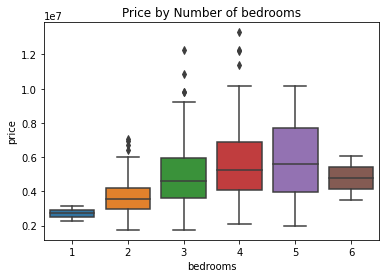

In [9]:

sns.boxplot(x='bedrooms', y='price', data=data)
plt.title('Price by Number of bedrooms')
plt.show()

## Multivariate Analysis 

## Scatter Plot

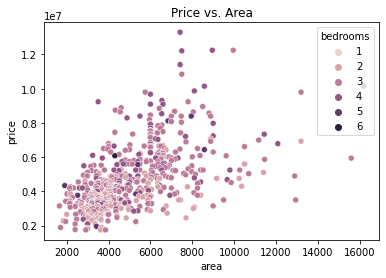

In [15]:
sns.scatterplot(x='area', y='price', data=data,hue='bedrooms')
plt.title('Price vs. Area')
plt.show()


# Cat Plot

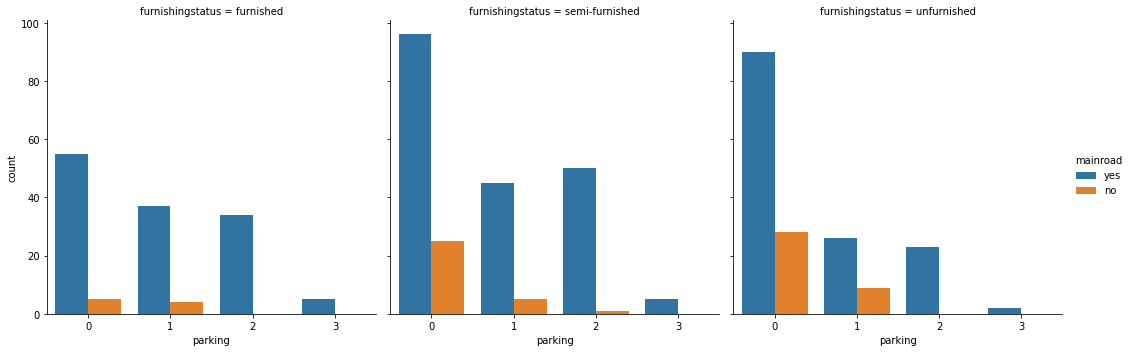

In [16]:
sns.catplot(x='parking', hue='mainroad', col='furnishingstatus', data=data, kind='count')
plt.show()



### Perform descriptive statistics on the dataset. 

In [17]:
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


###  Check for the Missing values.


In [18]:
missing_values = data.isnull().sum()
print(missing_values)

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
furnishingstatus    0
dtype: int64


### Find the outliers and replace the outliers

In [19]:
data['Area_dummy']=data['area']

In [20]:
z_threshold = 3
z_scores = (data['Area_dummy'] - data['Area_dummy'].mean()) / data['Area_dummy'].std()
outliers = (np.abs(z_scores) > z_threshold)
data.loc[outliers,'Area_dummy'] = data['Area_dummy'].mean()

In [21]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished,7420.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished,8960.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished,9960.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished,7500.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished,3000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished,2400.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished,3620.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished,2910.0


### Check for Categorical columns and perform encoding.


In [22]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['furnishingstatus']= label_encoder.fit_transform(data['furnishingstatus'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,0,7420.0
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,0,8960.0
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,1,9960.0
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,0,7500.0
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,2,3000.0
541,1767150,2400,3,1,1,no,no,no,no,no,0,1,2400.0
542,1750000,3620,2,1,1,yes,no,no,no,no,0,2,3620.0
543,1750000,2910,3,1,1,no,no,no,no,no,0,0,2910.0


In [23]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['mainroad']= label_encoder.fit_transform(data['mainroad'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,no,no,no,yes,2,0,7420.0
1,12250000,8960,4,4,4,1,no,no,no,yes,3,0,8960.0
2,12250000,9960,3,2,2,1,no,yes,no,no,2,1,9960.0
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,0,7500.0
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,2,3000.0
541,1767150,2400,3,1,1,0,no,no,no,no,0,1,2400.0
542,1750000,3620,2,1,1,1,no,no,no,no,0,2,3620.0
543,1750000,2910,3,1,1,0,no,no,no,no,0,0,2910.0


In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['guestroom']= label_encoder.fit_transform(data['guestroom'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,0,no,no,yes,2,0,7420.0
1,12250000,8960,4,4,4,1,0,no,no,yes,3,0,8960.0
2,12250000,9960,3,2,2,1,0,yes,no,no,2,1,9960.0
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,0,7500.0
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,2,3000.0
541,1767150,2400,3,1,1,0,0,no,no,no,0,1,2400.0
542,1750000,3620,2,1,1,1,0,no,no,no,0,2,3620.0
543,1750000,2910,3,1,1,0,0,no,no,no,0,0,2910.0


In [25]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['basement']= label_encoder.fit_transform(data['basement'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,0,0,no,yes,2,0,7420.0
1,12250000,8960,4,4,4,1,0,0,no,yes,3,0,8960.0
2,12250000,9960,3,2,2,1,0,1,no,no,2,1,9960.0
3,12215000,7500,4,2,2,1,0,1,no,yes,3,0,7500.0
4,11410000,7420,4,1,2,1,1,1,no,yes,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,2,3000.0
541,1767150,2400,3,1,1,0,0,0,no,no,0,1,2400.0
542,1750000,3620,2,1,1,1,0,0,no,no,0,2,3620.0
543,1750000,2910,3,1,1,0,0,0,no,no,0,0,2910.0


In [26]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['hotwaterheating']= label_encoder.fit_transform(data['hotwaterheating'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,0,0,0,yes,2,0,7420.0
1,12250000,8960,4,4,4,1,0,0,0,yes,3,0,8960.0
2,12250000,9960,3,2,2,1,0,1,0,no,2,1,9960.0
3,12215000,7500,4,2,2,1,0,1,0,yes,3,0,7500.0
4,11410000,7420,4,1,2,1,1,1,0,yes,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,no,2,2,3000.0
541,1767150,2400,3,1,1,0,0,0,0,no,0,1,2400.0
542,1750000,3620,2,1,1,1,0,0,0,no,0,2,3620.0
543,1750000,2910,3,1,1,0,0,0,0,no,0,0,2910.0


In [27]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['airconditioning']= label_encoder.fit_transform(data['airconditioning'])
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,7420,4,2,3,1,0,0,0,1,2,0,7420.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,8960.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,9960.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,0,7500.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,2,3000.0
541,1767150,2400,3,1,1,0,0,0,0,0,0,1,2400.0
542,1750000,3620,2,1,1,1,0,0,0,0,0,2,3620.0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2910.0


### Split the data into dependent and independent variables

In [38]:
columns_to_drop = ['price', 'Area_dummy']
x = data.drop(columns_to_drop, axis=1)
y=data['price']

In [39]:
y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [40]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
0,0.396564,4,2,3,1,0,0,0,1,2,0
1,0.502405,4,4,4,1,0,0,0,1,3,0
2,0.571134,3,2,2,1,0,1,0,0,2,1
3,0.402062,4,2,2,1,0,1,0,1,3,0
4,0.396564,4,1,2,1,1,1,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...
540,0.092784,2,1,1,1,0,1,0,0,2,2
541,0.051546,3,1,1,0,0,0,0,0,0,1
542,0.135395,2,1,1,1,0,0,0,0,0,2
543,0.086598,3,1,1,0,0,0,0,0,0,0


### Scale the independent variables

In [37]:
min_value = data['area'].min()
max_value = data['area'].max()
data['area']  = (data['area'] - min_value) / (max_value - min_value)

# Assign the scaled column back to the dataset
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus,Area_dummy
0,13300000,0.396564,4,2,3,1,0,0,0,1,2,0,7420.0
1,12250000,0.502405,4,4,4,1,0,0,0,1,3,0,8960.0
2,12250000,0.571134,3,2,2,1,0,1,0,0,2,1,9960.0
3,12215000,0.402062,4,2,2,1,0,1,0,1,3,0,7500.0
4,11410000,0.396564,4,1,2,1,1,1,0,1,2,0,7420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.092784,2,1,1,1,0,1,0,0,2,2,3000.0
541,1767150,0.051546,3,1,1,0,0,0,0,0,0,1,2400.0
542,1750000,0.135395,2,1,1,1,0,0,0,0,0,2,3620.0
543,1750000,0.086598,3,1,1,0,0,0,0,0,0,0,2910.0


In [36]:
data=data.drop(columns='scaled_area')

### Split the data into training and testing

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [42]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,furnishingstatus
46,0.298969,3,2,4,1,0,0,0,1,1,0
93,0.381443,3,2,1,1,0,1,0,1,3,1
335,0.148866,2,1,1,1,0,1,0,1,2,0
412,0.065979,3,1,2,1,0,1,0,0,0,2
471,0.144330,3,1,2,1,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,4,2,4,1,0,0,0,1,0,2
106,0.261168,4,2,1,1,0,1,0,1,0,1
270,0.195876,3,2,3,1,0,0,1,0,1,0
435,0.164261,2,1,1,1,0,0,0,0,0,2


In [43]:
y_train

46     7525000
93     6300000
335    3920000
412    3430000
471    3010000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 436, dtype: int64

## Build the model

In [44]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## Train the model

In [45]:
model.fit(X_train, y_train)

LinearRegression()

## Test the model

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred

array([5297993.14249124, 6750426.61492705, 3159324.32121344,
       4694118.82319432, 3455424.38616542, 3719362.82205546,
       5855623.32076951, 6044830.39884189, 2755895.02258043,
       2644206.77106943, 9077222.11222356, 2915809.97702119,
       3159062.29657078, 3420642.75512254, 3916584.69921135,
       5243762.63334761, 3046326.40939483, 4958973.82490907,
       4620528.92876186, 3654578.54852775, 5287383.79826483,
       5521794.39244501, 2843795.96947804, 4381914.3438955 ,
       5499031.01072886, 7162767.10789343, 3471551.45640189,
       5442411.413472  , 7930263.00861177, 3515737.32461718,
       5989146.93963073, 3441087.4347051 , 6903467.15880415,
       4312032.30634638, 3729953.91562683, 5880036.73104578,
       5041316.88746565, 4606717.15305103, 3198003.25800653,
       4719170.74057002, 4712279.64760328, 3629160.92856763,
       6730212.15666932, 4147442.99518594, 3844089.09469394,
       4427860.43120123, 6809826.83756891, 4141476.66481161,
       3955843.85438123,

## Measure the performance using Metrics

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 1852745807729.1436
R-squared Score: 0.6334513682813137


## Ridge regression

In [49]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [50]:
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

In [51]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 1852745807729.1436
R-squared Score: 0.6334513682813137


## Lasso Regression

In [52]:
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared Score:', r2)

Mean Squared Error: 1852745807729.1436
R-squared Score: 0.6334513682813137
